For $p=3$, we want to lift projective indecomposables (<-> idempotents) from $\mathbb{F}_3A_5$ to $\mathbb{Z}_{(3)}A_5$. 

Character related details are summarised below.

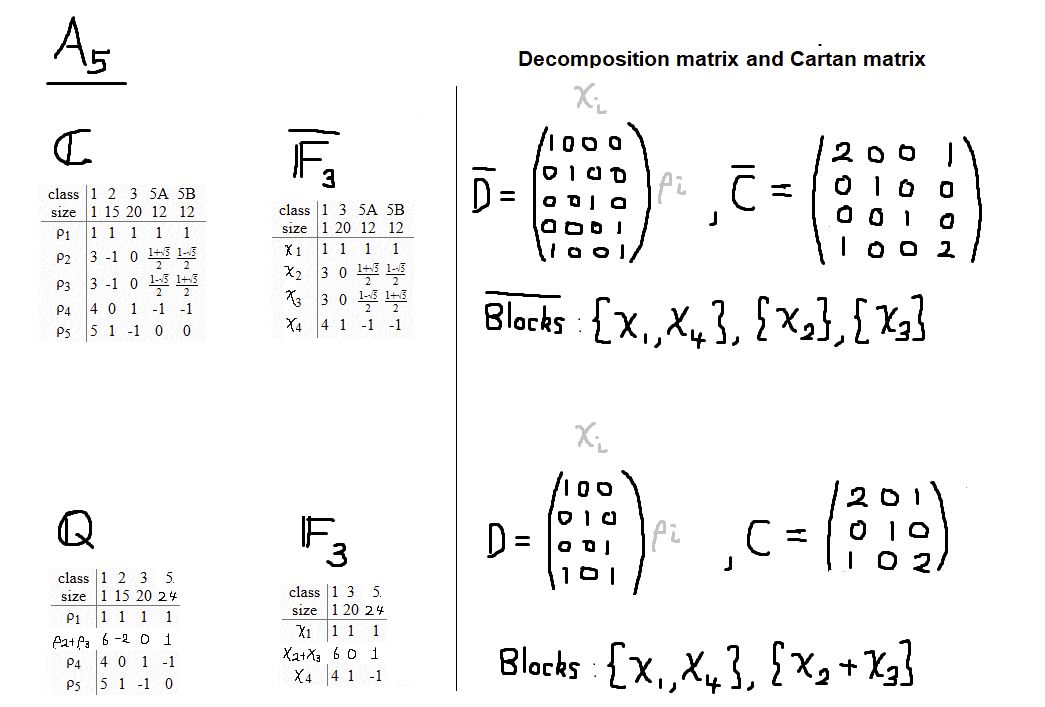

# Lifting the projective indecomposable $P(\chi_2 + \chi_3) = \chi_2 + \chi_3 \in \mathbb{F}_3A_5$  (the block of defect 1).


Writing $\text{Reduct}$ for "reduction modulo $p$", we have $\text{Reduct}(\rho_2 + \rho_3) = \chi_2 + \chi_3$. 

We consider the idempotent, say $e$, corresponding to $\rho_2 + \rho_3$ from $\mathbb{Z}_{(3)}\mathbb{A}_5$, reduce it (i..e, reduce coefficients) modulo $3$, say $\bar{e}$, and check the dimension of $\mathbb{F}_3A_5\bar{e}$. 

We have $\dim_{F_3}(\chi_2 + \chi_3) = 6$, so if $\dim(\mathbb{F}_3A_5\bar{e}) = 6$ then we have our lift

It turns out that the idempotent we want is given by the even terms of the idempotent associated to the 6 diml irreducible rep of $S_5$. We constuct this using Young symmetrisers below. We also show how it acts on irreducibles of $A_5$ (we see it acts as $1$ on the two 3d irreps, and 0 elsewhere, as expected.)

$\rho_2 + \rho_3 = \text{Res}(\text{6 diml of }S_5) $ 

In [1]:
#Set up $S_5$ and the group algebra.
n=5
S = groups.permutation.Symmetric(n)
QS = SymmetricGroupAlgebra(QQ, n)
sgn_rep = SymmetricGroupRepresentation([1]*n)
sgn = sgn_rep.to_character()

'''6d rep of S_5 corresponds to tableau
[1][2][3]
[4]
[5]
'''
#row stabiliser
a6 = sum(QS(g) for g in S.stabilizer([1,2,3],"OnSets").stabilizer(4))
#column stabiliser
b6 = sum(int(sgn(g))*QS(g) for g in S.stabilizer([1,4,5],"OnSets").stabilizer(2))
#The Young Symmetriser y = a*b
y6 = a6*b6
f6 = 1/20*y6
assert f6**2 == f6

#define e6 as even terms of f6 (with additional scale by 2 to maintain idempotence (compensate for less overall terms in the sum))
e6 = sum(2*coeff*QS(ele) for (ele,coeff) in f6 if sgn(S(ele)) ==1)
assert e6*e6 == e6
print(f"e6 = 2*sum_of_even_terms_of_f6 is:\n\n{e6}\n")
#check how e6 behaves on characters of A5
A5 = AlternatingGroup(5)
irr = A5.irreducible_characters()
print(f"Its values on irreducible characters of A_5 are:\n\n{[(f"ρ{indx}", sum(coeff*char(A5(grp_ele)) for (grp_ele,coeff) in e6)) for (indx,char) in enumerate(irr,1)]}")

e6 = 2*sum_of_even_terms_of_f6 is:

1/10*[1, 2, 3, 4, 5] - 1/10*[1, 3, 2, 5, 4] - 1/10*[2, 1, 3, 5, 4] + 1/10*[2, 3, 1, 4, 5] + 1/10*[2, 3, 4, 5, 1] + 1/10*[2, 3, 5, 1, 4] - 1/10*[2, 4, 3, 1, 5] - 1/10*[2, 5, 3, 4, 1] + 1/10*[3, 1, 2, 4, 5] - 1/10*[3, 2, 1, 5, 4] - 1/10*[3, 2, 4, 1, 5] - 1/10*[3, 2, 5, 4, 1] + 1/10*[3, 4, 2, 5, 1] + 1/10*[3, 5, 2, 1, 4] + 1/10*[4, 2, 3, 5, 1] - 1/10*[4, 3, 2, 1, 5] + 1/10*[5, 2, 3, 1, 4] - 1/10*[5, 3, 2, 4, 1]

Its values on irreducible characters of A_5 are:

[('ρ1', 0), ('ρ2', 1), ('ρ3', 1), ('ρ4', 0), ('ρ5', 0)]


Coefficients of the idempotent of $A_5$ above are $ \pm \frac{1}{10} \in \mathbb{Z}_{(3)}$. We restrict modulo $p=3$ ($10 = 1$ there) and check the dimension of the summand of $\mathbb{F}_3A_5$ given by multiplication by resulting idempotent.

In [2]:
F3A5 = GroupAlgebra(A5, GF(3))
e6bar = sum(GF(3)(c)*F3A5(g) for g, c in e6.monomial_coefficients().items())

spanning_set = [g * e6bar for g in A5]

#create coefficient matrix for each element g * e6bar, the rank of this matrix is the rank/dimension of F_3A_5\bar{e}.
coeff_array = []
for ele in spanning_set:
    coeffs = ele.monomial_coefficients()
    coeff_list = []
    for g in A5:
        try:
            #if g has non-zero coefficient, coeffs[g] will return it, else it has 0 coefficient
            coeff_list.append(coeffs[g])
        except:
            coeff_list.append(0)
    coeff_array.append(coeff_list)
    
coeff_matrix = Matrix(GF(3), coeff_array)
rank_of_matrix = coeff_matrix.rank()

print(f"The dimension of the F_3A_5 bar(e) is {rank_of_matrix}")

The dimension of the F_3A_5 bar(e) is 6


# The other block (principal block)

We have:

- $[P(\chi_1)] = 2[\chi_1] + [\chi_4] = 2[\rho_1] + [\rho_4] = [\rho_1] + [\rho_5]$ (projective indecomposable of dimension 6)
- $[P(\chi_4)] = [\chi_1] + 2[\chi_4] = [\rho_1] + 2[\rho_4] = [\rho_4] + [\rho_5]$  (projective indecomposable of dimension 9)

---
We first construct (rational) idempotents for $\rho_1$, $\rho_4$ and $\rho_5$ (note that these elements of $\mathbb{Q}A_5$ have denominators $60$, $15$ and $12$, respectively, and so are not in $\mathbb{Z}_{(3)}A_5$).

We may take sums of them (with the idea being that, e.g., $\frac{1}{60} + \frac{1}{12} = \frac{1}{10}$ clears the $3$ in the denominator). This doesn't quite work as we still have some 3s in denominator of some terms (e.g., $\frac{1}{60} - \frac{1}{12} = -\frac{1}{15}$ which still has 3 in denominator). 


---

We construct idempotents for $\rho_1$, $\rho_4$, $\rho_5$ below, using Young symmetrisers ( obtaining $e_1, e_4, e_5$). Then take the sums $e_1 + e_4$ and $e_1 + e_5$, and then go from there.

In [3]:
#idempotent e_1 

a1 = sum(QS(g) for g in S)
b1 = QS(S[0])
y1 = a1
f1 = 1/120*y1
assert f1**2 == f1
f1_twisted = sum(coeff*int(sgn(S(element)))*QS(element) for (element, coeff) in f1)
e1 = f1 +f1_twisted #sum of f1 and its twist is idemopotent in A5.
assert e1**2 == e1
print(f"e1 is:\n\n{e1}\n")
print(f"Its values on irreducible characters of A_5 are:\n\n{[(f"ρ{indx}", sum(coeff*char(A5(grp_ele)) for (grp_ele,coeff) in e1)) for (indx,char) in enumerate(irr,1)]}\n")

#idempotent e_4
'''one of the 4d reps of S_5 corresponds to tableau
[1][2][3][4]
[5]
'''
a4 = sum(QS(g) for g in S.stabilizer(5))
b4 = sum(int(sgn(g))*QS(g) for g in S.stabilizer(2).stabilizer(3).stabilizer(4))
y4 = a4*b4
f4 = 1/30*y4
assert f4**2 == f4
f4_twisted = sum(coeff*int(sgn(S(element)))*QS(element) for (element, coeff) in f4)
e4 = f4 +f4_twisted
assert e4**2 == e4
print(f"e4 is:\n\n{e4}\n")
print(f"Its values on irreducible characters of A_5 are:\n\n{[(f"ρ{indx}", sum(coeff*char(A5(grp_ele)) for (grp_ele,coeff) in e4)) for (indx,char) in enumerate(irr,1)]}\n")

#idempotent e_5
'''one of the 5d reps of S_5 corresponds to tableau
[1][2]
[3][4]
[5]
'''
a5 = sum(QS(g) for g in S.stabilizer([1,2],"OnSets").stabilizer([3,4],"OnSets"))
b5 = sum(int(sgn(g))*QS(g) for g in S.stabilizer([1,3,5],"OnSets"))
y5 = a5*b5
f5 = 1/24*y5
assert f5**2 == f5
f5_twisted = sum(coeff*int(sgn(S(element)))*QS(element) for (element, coeff) in f5)
e5 = f5 +f5_twisted
assert e5**2 == e5
print(f"e5 is:\n\n{e5}\n")
print(f"Its values on irreducible characters of A_5 are:\n\n{[(f"ρ{indx}", sum(coeff*char(A5(grp_ele)) for (grp_ele,coeff) in e5)) for (indx,char) in enumerate(irr,1)]}\n")

e1 is:

1/60*[1, 2, 3, 4, 5] + 1/60*[1, 2, 4, 5, 3] + 1/60*[1, 2, 5, 3, 4] + 1/60*[1, 3, 2, 5, 4] + 1/60*[1, 3, 4, 2, 5] + 1/60*[1, 3, 5, 4, 2] + 1/60*[1, 4, 2, 3, 5] + 1/60*[1, 4, 3, 5, 2] + 1/60*[1, 4, 5, 2, 3] + 1/60*[1, 5, 2, 4, 3] + 1/60*[1, 5, 3, 2, 4] + 1/60*[1, 5, 4, 3, 2] + 1/60*[2, 1, 3, 5, 4] + 1/60*[2, 1, 4, 3, 5] + 1/60*[2, 1, 5, 4, 3] + 1/60*[2, 3, 1, 4, 5] + 1/60*[2, 3, 4, 5, 1] + 1/60*[2, 3, 5, 1, 4] + 1/60*[2, 4, 1, 5, 3] + 1/60*[2, 4, 3, 1, 5] + 1/60*[2, 4, 5, 3, 1] + 1/60*[2, 5, 1, 3, 4] + 1/60*[2, 5, 3, 4, 1] + 1/60*[2, 5, 4, 1, 3] + 1/60*[3, 1, 2, 4, 5] + 1/60*[3, 1, 4, 5, 2] + 1/60*[3, 1, 5, 2, 4] + 1/60*[3, 2, 1, 5, 4] + 1/60*[3, 2, 4, 1, 5] + 1/60*[3, 2, 5, 4, 1] + 1/60*[3, 4, 1, 2, 5] + 1/60*[3, 4, 2, 5, 1] + 1/60*[3, 4, 5, 1, 2] + 1/60*[3, 5, 1, 4, 2] + 1/60*[3, 5, 2, 1, 4] + 1/60*[3, 5, 4, 2, 1] + 1/60*[4, 1, 2, 5, 3] + 1/60*[4, 1, 3, 2, 5] + 1/60*[4, 1, 5, 3, 2] + 1/60*[4, 2, 1, 3, 5] + 1/60*[4, 2, 3, 5, 1] + 1/60*[4, 2, 5, 1, 3] + 1/60*[4, 3, 1, 5, 2] + 1/6

Its values on irreducible characters of A_5 are:

[('ρ1', 1), ('ρ2', 0), ('ρ3', 0), ('ρ4', 0), ('ρ5', 0)]

e4 is:

1/15*[1, 2, 3, 4, 5] + 1/15*[1, 3, 4, 2, 5] + 1/15*[1, 4, 2, 3, 5] + 1/15*[2, 1, 4, 3, 5] + 1/15*[2, 3, 1, 4, 5] - 1/15*[2, 3, 4, 5, 1] + 1/15*[2, 4, 3, 1, 5] - 1/15*[2, 4, 5, 3, 1] - 1/15*[2, 5, 3, 4, 1] + 1/15*[3, 1, 2, 4, 5] + 1/15*[3, 2, 4, 1, 5] - 1/15*[3, 2, 5, 4, 1] + 1/15*[3, 4, 1, 2, 5] - 1/15*[3, 4, 2, 5, 1] - 1/15*[3, 5, 4, 2, 1] + 1/15*[4, 1, 3, 2, 5] + 1/15*[4, 2, 1, 3, 5] - 1/15*[4, 2, 3, 5, 1] + 1/15*[4, 3, 2, 1, 5] - 1/15*[4, 3, 5, 2, 1] - 1/15*[4, 5, 2, 3, 1] - 1/15*[5, 2, 4, 3, 1] - 1/15*[5, 3, 2, 4, 1] - 1/15*[5, 4, 3, 2, 1]



Its values on irreducible characters of A_5 are:

[('ρ1', 0), ('ρ2', 0), ('ρ3', 0), ('ρ4', 1), ('ρ5', 0)]

e5 is:

1/12*[1, 2, 3, 4, 5] - 1/12*[1, 2, 4, 5, 3] - 1/12*[1, 4, 2, 3, 5] + 1/12*[1, 4, 5, 2, 3] + 1/12*[2, 1, 4, 3, 5] - 1/12*[2, 1, 5, 4, 3] - 1/12*[2, 3, 1, 4, 5] + 1/12*[2, 3, 4, 5, 1] - 1/12*[2, 5, 3, 4, 1] + 1/12*[2, 5, 4, 1, 3] - 1/12*[3, 2, 4, 1, 5] + 1/12*[3, 2, 5, 4, 1] + 1/12*[3, 4, 1, 2, 5] - 1/12*[3, 4, 2, 5, 1] + 1/12*[4, 1, 2, 5, 3] - 1/12*[4, 1, 3, 2, 5] + 1/12*[4, 3, 2, 1, 5] - 1/12*[4, 3, 5, 2, 1] - 1/12*[4, 5, 1, 2, 3] + 1/12*[4, 5, 2, 3, 1] + 1/12*[5, 2, 1, 4, 3] - 1/12*[5, 2, 4, 3, 1] - 1/12*[5, 4, 2, 1, 3] + 1/12*[5, 4, 3, 2, 1]



Its values on irreducible characters of A_5 are:

[('ρ1', 0), ('ρ2', 0), ('ρ3', 0), ('ρ4', 0), ('ρ5', 1)]



In [4]:
def no_threes_in_denom_check(val):
    try:
        GF(3)(val)
        return True
    except ZeroDivisionError:
        return False

e1pluse5 = e1 + e5

e1pluse5_no_3s = sum(coeff*QS(ele) for (ele,coeff) in e1pluse5 if no_threes_in_denom_check(coeff))
print(f"e1pluse5_no_3s values on irreducible characters of A_5 are:\n\n{[(f"ρ{indx}", sum(coeff*char(A5(grp_ele)) for (grp_ele,coeff) in e1pluse5_no_3s)) for (indx,char) in enumerate(irr,1)]}\n")

e4pluse5 = e4 + e5

e4pluse5_no_3s = sum(coeff*QS(ele) for (ele,coeff) in e4pluse5 if no_threes_in_denom_check(coeff))
print(f"e4pluse5_no_3s values on irreducible characters of A_5 are:\n\n{[(f"ρ{indx}", sum(coeff*char(A5(grp_ele)) for (grp_ele,coeff) in e4pluse5_no_3s)) for (indx,char) in enumerate(irr,1)]}\n")

e1pluse4 = e1 + e4

e1pluse4_no_3s = sum(coeff*QS(ele) for (ele,coeff) in e1pluse4 if no_threes_in_denom_check(coeff))
print(f"e4pluse5_no_3s values on irreducible characters of A_5 are:\n\n{[(f"ρ{indx}", sum(coeff*char(A5(grp_ele)) for (grp_ele,coeff) in e1pluse4_no_3s)) for (indx,char) in enumerate(irr,1)]}\n")

e1pluse5_no_3s values on irreducible characters of A_5 are:

[('ρ1', 6/5), ('ρ2', 0), ('ρ3', 0), ('ρ4', 1/5), ('ρ5', 4/5)]

e4pluse5_no_3s values on irreducible characters of A_5 are:

[('ρ1', 0), ('ρ2', 0), ('ρ3', 0), ('ρ4', 3/4), ('ρ5', 6/5)]

e4pluse5_no_3s values on irreducible characters of A_5 are:

[('ρ1', -3/5), ('ρ2', 0), ('ρ3', 0), ('ρ4', 3/20), ('ρ5', 0)]



Using eXpluseY_no_3s as above (or rather, their values on the simples), we try to find a (rational) linear combination which acts as $(1,0,0,0,1)$ and $(0,0,0,1,1)$. 

As $\rho_2$ and $\rho_3$ are zero everywhere, we exclude these entries (so we are solving a $3 \times 3$ linear system)

In [5]:
import numpy as np
import sympy as sp

#augmentated matrix (rho_values | (1,0,0,0,1)), but ignore 2nd and 3rd entries
A15 = sp.Matrix([
    [6/5, 0, -3/5, 1],
    [1/5, 3/4, 3/20, 0],
    [4/5, 6/5, 0, 1]
])

#augmentated matrix (rho_values | (0,0,0,1,1))
A45 = sp.Matrix([
    [6/5, 0, -3/5, 0],
    [1/5, 3/4, 3/20, 1],
    [4/5, 6/5, 0, 1]
])

rref_A15, _ = A15.rref()
rref_A45, _ = A15.rref()

print("RREF of A15 is:\n")
sp.pprint(rref_A15)

print("\n RREF of A45 is:\n")
sp.pprint(rref_A45)

print("\nInconsistent system :(")

RREF of A15 is:

⎡1  0  -1/2  0⎤
⎢             ⎥
⎢0  1  1/3   0⎥
⎢             ⎥
⎣0  0   0    1⎦

 RREF of A45 is:

⎡1  0  -1/2  0⎤
⎢             ⎥
⎢0  1  1/3   0⎥
⎢             ⎥
⎣0  0   0    1⎦

Inconsistent system :(


# New plan (get central idempotent, then break it down)

The block decomposition of $\mathbb{F}_3A_5$ is $B_0 \oplus B_1$, where:

- $B_0 = P(\chi_1) \oplus P(\chi_4)^{\oplus 4}$ of dimension $1 \times 6 + 4 \times 9 = 42$, 
- $B_1 = P(\chi_2 \oplus \chi_3)^{\oplus 3}$ of dimension $6 \times 3 = 18$.

The (central) idempotents corresponding to the blocks are easy. We find $CI_1$ (central idempotent $1$) corresponding to block $B_1$ (i.e., the "nice" block). Then $CI_0 := 1 - CI_1$ is a central idempotent for the block $B_0$ (the principal block).

By the principal block decomposition into indecomposable projectives, we know that $CI_0 = f_1 +f_{41} + f_{42} + f_{43} + f_{44}$.

## Breaking it down (using subgroups of $A_5$)

Take a subgroup $H \subset A_5$, $3 \not| |H|$. Then the idempotents of simple complex modules with rational entries of $H$ are also idempotents in $A_5$ (and crucially, elements of $\mathbb{Z}_{(3)}A_5$, which can be reduced modulo $3$). Call such an idempotent $x \in \mathbb{Q}H \subset \mathbb{Q}A_5$, and denote its reduction modulo $3$ as $\bar{x} \in \mathbb{F}_3A_5$.

Then $xCI_0 \in B_0$ is in the principal block. Moreover, as $CI_0$ is central, $(xCI_0)^2 = xCI_0$ and so $xCI_0$ is an idempotent. Thus $xCI_0 = \varepsilon_1 f_1 + \ldots + \varepsilon_{44} f_{44}$ where each $\varepsilon_i \in \{0,1\}$.

---

Plan: 
- Find $CI_1$ and $CI_0$ -- the central idempotents. 
- Take $H \cong K_4 \subset A_5$, and take idempotent associated to trivial representation. (denom. will be $|K_4| = 4$, importantly, it doesn't conain any $3$s)
- Reduce modulo $3$ (to obtain element of $\mathbb{F}_3H \subset \mathbb{F}_3A_5$). 
- Multiply by $CI_0$ to project to principal block.

In [6]:
A5 = AlternatingGroup(5)
F3 = GF(3)
A = GroupAlgebra(A5, F3)

#Central idempotent for block B1 is given by conjugacy class sums on character values of \rho_2 + \rho_3 = (6,-2,0,1,1) for classes 1,2,3,5A,5B respectively
CI_1_char_values = [6,-2,0,1,1]
conj_classes_A5 = A5.conjugacy_classes() # these classes are in the order 1,2,3,5,5, so order is compatible with above

CI_1 = 2*sum(val * A(ele) for (val, ccl) in zip(CI_1_char_values,conj_classes_A5) for ele in ccl) #Note: 2 = 1/20 in F_3
assert CI_1**2 == CI_1
CI_0 = 1 - CI_1
assert CI_0**2 == CI_0

In [7]:
g1 = A5("(1,2)(3,4)")
g2 = A5("(1,3)(2,4)")
H = A5.subgroup([g1, g2])

xbar = 1*sum(A(ele) for ele in H) #xbar is reduction modulo 3 (of "trivial idempotent"). Note that 1 = 1/4 = 1/|H| in F_3
assert xbar**2 == xbar

assert CI_0 * xbar == xbar #projection of xbar to principal block gives xbar. That is, xbar is already in the principal block

Claim: Suppose we have idempotents $e$,$f$ such that $ef = fe = f$. Then $e-f$ is an idempotent.

Proof: $(e-f)^2 =  e^2 - ef - fe + f^2= e - f -f +f = e-f$.

---

For us, $CI_0$ and $\text{xbar}$ satisfy conditions of claim. Thus, $$B_0 = B_0\text{xbar} \oplus B_0(CI_0 - \text{xbar}).$$

Moreover, $B_0 = \mathbb{F}_3A_5CI_0$ and so this is equivalent to (using $CI_0\text{xbar} = \text{xbar}CI_0 = \text{xbar}$): $$B_0 = \mathbb{F}_3A_5\text{xbar} \oplus \mathbb{F}_3A_5(CI_0-\text{xbar})$$

---

We now find dimensions of these summands. For a given idempotent $e$, we find dimension of $\mathbb{F}_3A_5e$ by constructing the $60 \times 60$ matrix of coefficients of $ge$ for $g \in A_5$, then find its rank.

In [8]:
def dimAe(e, two_sided = False):
    """
    Given idempotent e, find dimension of F_3A_5e if two_sided = False, and eF_3A_5e if two_sided = True
    """
    if two_sided:
        spanning_set = [e * g * e for g in A5]
    else:
        spanning_set = [g * e for g in A5]

    #create coefficient matrix for each element, the rank of this matrix is the rank/dimension.
    coeff_array = []
    for ele in spanning_set:
        coeffs = ele.monomial_coefficients() #dict of form{'<grp_element>': <coeff>}
        coeff_list = []
        for g in A5:
            try:
                #if g has non-zero coefficient, coeffs[g] will return it, else it has 0 coefficient
                coeff_list.append(coeffs[g])
            except:
                coeff_list.append(0)
        coeff_array.append(coeff_list)
    coeff_matrix = Matrix(GF(3), coeff_array)
    rank_of_matrix = coeff_matrix.rank()
    return rank_of_matrix

print(f"dimension of A(xbar) is {dimAe(xbar)}")
print(f"dimension of A(CI_0-xbar) is {dimAe(CI_0-xbar)}")

dimension of A(xbar) is 15
dimension of A(CI_0-xbar) is 27


## In summary:

- $B_0\text{xbar}$ has dimension $15$ (and therefore is $P(\chi_1) \oplus P(\chi_4)$).

- $B_0(CI_0 - \text{xbar})$ has dimension $27$ (and therefore is $P(\chi_4)^{\oplus 3}$). 

## Moreover...

In fact, the (primitive) idempotents corresponding to $P(\chi_1)$ and $P(\chi_4)$ must lie in the **two sided ideal** $\text{xbar}(B_0)\text{xbar} = \text{xbar}(\mathbb{F}_3A_5)\text{xbar}$.

Indeed, a (primitive) idempotent $e$ yields a (indecomposable) module $Ae$, and $\text{End}_A(Ae) = eAe$, so $e \in \text{End}_A(Ae)$. Moreover, $\text{End}(P) \subset \text{End}(P \oplus Q)$.

## Next up

So, we constuct $\text{xbar}(\mathbb{F}_3A_5)\text{xbar}$ (it turns out that dimension is 6, see below). Then we find a basis (basically above function + RREF).

In [9]:
print(f"dimension of xbar(F_3A_5)xbar is {dimAe(xbar, two_sided = True)}") #dimension is 6

def coeffs_of_basis_two_sided(e):
    """
    Given idempotent e, finds coefficients of basis of eAe, where A = F_3A_5
    (ordering of coeffs follows order of [g for g in AlternatingGroup(5)])
    """
    spanning_set = [e * g * e for g in A5]
    coeff_array = []
    for ele in spanning_set:
        coeffs = ele.monomial_coefficients() #dict of form{'<grp_element>': <coeff>}
        coeff_list = []
        for g in A5:
            try:
                #if g has non-zero coefficient, coeffs[g] will return it, else it has 0 coefficient
                coeff_list.append(coeffs[g])
            except:
                coeff_list.append(0)
        coeff_array.append(coeff_list)
    coeff_matrix = Matrix(GF(3), coeff_array)
    
    #Now, just apply RREF, and extract the non zero rows (rows with a pivot)
    return [v for v in coeff_matrix.rref().rows() if v.is_zero() == False]

xAx_basis_coeffs = coeffs_of_basis_two_sided(xbar)
xAx_basis = [sum(coeff * A(g) for (coeff,g) in zip(coeffs,A5)) for coeffs in xAx_basis_coeffs]

dimension of xbar(F_3A_5)xbar is 6


Finally, we have a basis of $\text{xbar}(A)\text{xbar}$ (of dimension $6$). There are $|\{0,1,2\}|^6 = 3^6= 729$ elements. Brute force them to find idempotents.

There will (I hope) be four. Namely, $0$, $\text{xbar}$ itself, and two others $\alpha$ and $\beta$ say. We will have $\dim(A\text{xbar}) = 15$, $\dim(A\alpha) = 6$ and $\dim(A\beta) = 9$. Thus $A\alpha = P(\chi_1)$, $A\beta = P(\chi_4)$.

Note to self: This is true (I think) up to conjugacy, but there are actually more , namely these 4 and conjugates.

In [10]:
possible_coeffs = cartesian_product([[0,1,2]] * 6)

idempotents_in_xAx = []

for coeffs in possible_coeffs:
    test_element = sum(coeff * ele for (coeff,ele) in zip(coeffs, xAx_basis))
    if test_element**2 == test_element:
        idempotents_in_xAx.append(test_element)

#Of these idempotents, e, dim(Ae) = 0,6,9,15. Find an idempotent for dim(Ae) = 6 and 9.

idem_P1 = None
idem_P4 = None

for idem in idempotents_in_xAx:
    if (not idem_P1) and dimAe(idem) == 6:
       idem_P1 = idem
    if (not idem_P4) and dimAe(idem) == 9:
       idem_P4 = idem
    if idem_P1 and idem_P4:
        break

assert idem_P1**2 == idem_P1
assert dimAe(idem_P1) == 6

assert idem_P4**2 == idem_P4
assert dimAe(idem_P4) == 9

print(idem_P1)
print("")
print(idem_P4)

() + 2*(2,3)(4,5) + 2*(2,3,4) + 2*(2,3,5) + 2*(2,4,3) + 2*(2,5,3) + (1,2)(3,4) + 2*(1,2,3) + 2*(1,2,4,5,3) + 2*(1,2,4) + 2*(1,2,4,3,5) + 2*(1,2,5,4,3) + 2*(1,3,2) + 2*(1,3,4,5,2) + 2*(1,3,5,4,2) + 2*(1,3,4) + (1,3)(2,4) + 2*(1,3,4,2,5) + 2*(1,4,2) + 2*(1,4,3) + 2*(1,4,5) + 2*(1,4)(3,5) + (1,4)(2,3) + 2*(1,4)(2,5) + 2*(1,5,3,4,2) + 2*(1,5,4) + 2*(1,5)(2,3) + 2*(1,5,2,4,3)

(2,3)(4,5) + (2,3,4) + (2,3,5) + (2,4,3) + (2,5,3) + (1,2,3) + (1,2,4,5,3) + (1,2,4) + (1,2,4,3,5) + (1,2,5,4,3) + (1,3,2) + (1,3,4,5,2) + (1,3,5,4,2) + (1,3,4) + (1,3,4,2,5) + (1,4,2) + (1,4,3) + (1,4,5) + (1,4)(3,5) + (1,4)(2,5) + (1,5,3,4,2) + (1,5,4) + (1,5)(2,3) + (1,5,2,4,3)


We now have idempotents $\alpha$ and $\beta$ in $\mathbb{F}_3A_5$ such that $\mathbb{F}_3A_5\alpha = P(\chi_1)$ and $\mathbb{F}_3A_5\beta= P(\chi_4)$.

I tried to lift them using the following idea (which I believe works for complete rings. It was futile. I'm stuck.

The idea was: 

- Take any lift of the idempotent, say $\Alpha \in \mathbb{Z}_{(3)}A_5$ (for example, just view the coefficients from $\mathbb{F}_3$ as elements of $\{0,1,2\} \in \mathbb{Z}^3$).
- Apply $A_{new} = 3A^2 - 2A^3$ iteratively
- It stabilises if it stumbles upon an idempotent. Indeed, if $A_n$ is idempotent then $A_{n+1} = 3A_n^2 - 2A_n^3 = 3A_n - 2A_n = A_n$.

In [14]:
QA = GroupAlgebra(A5,QQ)

#This doesn't seem to work. Makes error term in (3^n)Z_{(3)}A_5 but theres no 3-adic convergence?
def hensels_iteration(ele):
    """Takes an element in Z_(3)A_5 and tries to produce an idempotent via iteratively applying x -> 3x^2 - 2x^3"""
    num_its = 6
    while num_its > 0:
        print(num_its)
        num_its -=1
        ele_old = ele
        ele = 3*ele**2 - 2*ele**3
        if ele - ele_old == 0:
            return ele
    print("Max iterations reached. The result is approximate.")
    return ele

def lift_coeff_naive(c):
    mapping = {0:0,1:1,2:2}
    return mapping[int(c)]

idem_P1_any_lift_to_QQ = sum(lift_coeff_naive(coeff)*QA(ele) for (ele,coeff) in idem_P1.monomial_coefficients().items())
print("error term: e^2 - e (need this to be zero):\n")
print(idem_P1_any_lift_to_QQ**2-idem_P1_any_lift_to_QQ)

error term: e^2 - e (need this to be zero):

99*() + 48*(3,4,5) + 48*(3,5,4) + 30*(2,3)(4,5) + 30*(2,3,4) + 30*(2,3,5) + 30*(2,4,3) + 48*(2,4,5) + 48*(2,4)(3,5) + 30*(2,5,3) + 48*(2,5,4) + 48*(2,5)(3,4) + 48*(1,2)(4,5) + 99*(1,2)(3,4) + 48*(1,2)(3,5) + 30*(1,2,3) + 48*(1,2,3,4,5) + 48*(1,2,3,5,4) + 30*(1,2,4,5,3) + 30*(1,2,4) + 30*(1,2,4,3,5) + 30*(1,2,5,4,3) + 48*(1,2,5) + 48*(1,2,5,3,4) + 30*(1,3,2) + 30*(1,3,4,5,2) + 30*(1,3,5,4,2) + 48*(1,3)(4,5) + 30*(1,3,4) + 48*(1,3,5) + 99*(1,3)(2,4) + 48*(1,3,2,4,5) + 48*(1,3,5,2,4) + 48*(1,3)(2,5) + 48*(1,3,2,5,4) + 30*(1,3,4,2,5) + 48*(1,4,5,3,2) + 30*(1,4,2) + 48*(1,4,3,5,2) + 30*(1,4,3) + 30*(1,4,5) + 30*(1,4)(3,5) + 48*(1,4,5,2,3) + 99*(1,4)(2,3) + 48*(1,4,2,3,5) + 48*(1,4,2,5,3) + 48*(1,4,3,2,5) + 30*(1,4)(2,5) + 48*(1,5,4,3,2) + 48*(1,5,2) + 30*(1,5,3,4,2) + 48*(1,5,3) + 30*(1,5,4) + 48*(1,5)(3,4) + 48*(1,5,4,2,3) + 30*(1,5)(2,3) + 48*(1,5,2,3,4) + 30*(1,5,2,4,3) + 48*(1,5,3,2,4) + 48*(1,5)(2,4)
